## Introduction to Python for Hydrology
## Session 6: Parsing Fortran Text Output Files into Python Data Structures

## Prepared by Brad Wolaver
New Mexico Office of the State Engineer, Hydrology Bureau, Santa Fe, NM<br>
December 20, 2024 (Updated January 3, 2025)

## First, Some Background on Parsing Text Files

**What is parsing?** <br>
"Parsing data in Python involves breaking down a given text or file into smaller parts that can be easily analyzed and manipulated.  This process is essential in many applications, such as web scraping, data analysis, and natural language processing [from source #1 below]".
<br>
<br>
**In other words:** <br>
Parsing is like taking a messy file, reading it, breaking it into pieces, and organizing it into a format you can work with.
<br>
<br>
**The Good, Bad, and Ugly of Fortran-Generated Text Files:**
1. **Bad:** Fortran formatting is rigid and unforgiving.  If you get spacing or patterns incorrect, the program can struggle to parse your files.
2. **Good:** Fortran formatting is consistent and predictable. If you use this attribute to your advantage, it can make parsing data easier.
<br>
<br>

**A note on Regular Expressions (RegEx):** <br>
- As we'll see while regular expressions are powerful tools for pattern matching and text manipulation.
- But they can often become difficult to read, maintain, and debug, especially for complex patterns.
- An old friend of mine who's a software developer told me a saying about regular expressions:<br>
<t>"Some people, when confronted with a problem, think <i>'I know, I'll use regular expressions.'</i>  Now they have two problems."<br>
<br>

## Objective
**Parse Fortran-Generated Text Files into Python-Compatible Data:** <br>
- Learn how to read and process complex text files, transforming the data into usable Python data structures for analysis and visualization.
- Specifically, we'll:
  - Illustrate text parsing using output files from the OSE's Glover-Balmer program.
  - Read in years, depletion rates, and aquifer parameters.
  - Calculate and plot net stream depletion and annotate the figure with transmissivity and storativity values.

## Expected Outcomes
By the end of this session, you should be able to:
- **Understand the structure** of Fortran-generated text files and identify key patterns.
- **Read a text file** using `open()` and `with`.
- **Parse specific data** from the file using basic text parsing techniques, primarily string splitting with `split()`, conditional checks, and using regular expressions (the `re` module uses syntax that can be a little tricky to understand—at least for me!).
- **Convert extracted text into numerical data** and store it in Python.
- **Flow Control:** In flow control, Boolean values are used for condition evaluation, operators compare values, and statements and loops dictate the execution flow of code based on those conditions.
- **Visualize the parsed data** using `matplotlib.pyplot`.  Add annotation to the plot using parsed data (Transmissivity and Storativity).

## Python Libraries and Tools Used
- **`pandas (pd)`:** For data manipulation and analysis, well-suited for reading and transforming tabular data, such as turning raw text into structured DataFrames.
- **Built-in string methods:** Useful for basic text manipulation tasks like splitting, stripping, and replacing string portions when parsing files.
- **`re`:** Provides tools for pattern matching and manipulation of strings using regular expressions, allowing users to search, extract, and modify text based on specific patterns.
- **`os`:** This module provides functionality to interact with the operating system, such as navigating the file system, reading and writing files, and managing paths. It's useful for handling file operations when automating the parsing of text files.
- **`numpy (np)`:** Useful for handling numerical operations and managing arrays, especially when performing calculations on parsed datasets.
- **`matplotlib.pyplot (plt)`:** A plotting library used to create various types of charts and graphs, enabling you to visualize parsed data effectively.
- **`%matplotlib inline`:** A Jupyter Notebook magic command to display plots within the notebook cells for immediate data visualization.
- **`Markdown`** class of **`IPython.display`** allows you to render Mardown-formatted text.  We'll use this to make some of the data printed to console easier to read.  The `HTML` module lets you print text in color.

These tools and libraries work together to read, clean, process, and visualize data parsed from legacy Fortran text files, integrating these datasets into your Python workflows efficiently.

## Sources for this section, and further exploration, include:

1. [Parsing Data in Python: A Tutorial for Beginners](https://pieriantraining.com/parsing-data-in-python-a-tutorial-for-beginners/).<br>
From the book's webpage:
<i>"Data parsing is a crucial aspect of data processing that involves extracting relevant information from raw data. In the world of programming, data parsing is an essential skill that helps developers to read, manipulate, and transform data in various formats such as JSON, XML, CSV, and HTML."</i>
 
3. This e-book book, [<u>Automate the Boring Stuff, by Al Sweigart</u>](https://automatetheboringstuff.com/), has good explanations of:
    - [Working with strings](https://automatetheboringstuff.com/2e/chapter6/), 
    - [Pattern matching with regular expressions](https://automatetheboringstuff.com/2e/chapter7/), and
    - [Flow control](https://automatetheboringstuff.com/2e/chapter2/). For example:
      - Boolean values: `true` / `false`,
      - Comparison operators such as `==`,
      - `if` statements,
      - `else` statements,
      - `elif` statements,
      - `while` loops, and
      - `break` statements.
<br><br>   
4. The e-book book [<u>Python Data Science Handbook, 2nd Edition by Jake VanderPlas</u>](https://jakevdp.github.io/PythonDataScienceHandbook/) is a little more advanced. <br>
    - Here's [the book's contents as Jupyter Notebooks!](https://github.com/jakevdp/PythonDataScienceHandbook?utm_source=chatgpt.com) and<br>
    - A link to the [Chapter 3](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), which has a section on Vectorizing String Operations.
<br><br>
5. Even more advanced.
    - Python for Data Analysis: Data Wrangling with pandas, NumPy & Jupyter</u>.
    - You can [find the free e-book here](https://wesmckinney.com/book/).
    - The book was recommended to me by Tim Hodson, the lead for the USGS's [dataretrieval](https://doi-usgs.github.io/dataretrieval-python/examples/index.html#) package for streamflow downloads, which—in addition to `Hydrofunctions`—is another tool to automate downloading USGS data


## Step 0. Activate Environment in Anaconda Prompt Before Running this Jupyter Notebook

- In Anaconda Prompt, make sure you have updated the `python_hydro` environment using `environment_update.yml`.- 
- If you haven't done this yet, see Sessions 3 and 4 for instructions.
- Open Anaconda Prompt and change your working directory with `cd <path to working directory>`
- Activate environment with `conda activate python_hydro`

## Step 1. Install Necessary Libraries

In [1]:
# Step 1: Import Necessary Libraries

import os  # For interacting with the operating system
import matplotlib.pyplot as plt  # For plotting data
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from IPython.display import Markdown, HTML, display # For displaying markdown-formatted text and HTML
from datetime import datetime  # Import datetime to generate timestamps for filenames
import re  # The regex library is used to parse using pattern matching

# This magic command ensures that plots are displayed within the Jupyter Notebook
%matplotlib inline

**Using AI Tools to Create and Refine Python Code:**

Much of the code in this Session was edited or created using [**OpenAI's GPT-4o Mini model**](https://openai.com/index/gpt-4o-mini-advancing-cost-efficient-intelligence/) using [**TypingMind**](https://www.typingmind.com/).  
- **TypingMind** is an AI platform that integrates with APIs for AI tools like GPT-4o (but supports many such models), providing a cost-effective pay-as-you-go solution for interacting with advanced AI tools. It offers a user-friendly interface for a variety of tasks, including code development..
- **GPT-4o Mini** is a lightweight AI model from OpenAI designed to handle text-based tasks efficiently, including processing large prompts and generating Python code. It is well suited for tightly defined tasks and is more affordable compared to some models, such as reasoning models.
- **Reasoning Models (e.g., GPT-O1 Preview)**: For tasks requiring advanced problem solving or nuanced reasoning, reasoning models like GPT-O1 Preview are ideal but are more expensive.

Again, it’s a good idea to read the formal Python documents to understand how to use the tools contained in this and previous sessions.

## Step 2. Identify Output Files to Process

**Explanation:**
  
**`input()`** Function: Prompt the user to input filenames of the Baseline and Application output files.

**Why?**
  
Inputting names of the Baseline and Application output files makes the code more flexible by allowing the script to process different file names without modifying the code.

In [2]:
# Step 2: Identify Output Files to Process

# Prompt the user to input the name of the Baseline output file
file_baseline = input("\nEnter baseline output file name (i.e., Baseline_DIV_gs.out): ")

# Prompt the user to input the name of the Application output file
file_application = input("\nEnter application output file name (i.e., Application_DIV_gs.out): ")

# Print the entered file names to confirm
# Use an f-string to mix strings and variables
print(f"\nHere are the file names you entered:\nBaseline File: \t\t{file_baseline}")
print(f'Application File: \t{file_application}\n\nNext, we will verify that the files exist in your current working directory\n')


Enter baseline output file name (e.g., baseline.out):  Baseline_DIV_gs.out

Enter application output file name (e.g., application.out):  Application_DIV_gs.out



Here are the file names you entered:
Baseline File: 		Baseline_DIV_gs.out
Application File: 	Application_DIV_gs.out

Next, we will verify that the files exist in your current working directory



## Step 3: Verify File Existence and Inspect Contents

**Objective:**
  
Check whether the specified Baseline and Application files exist in the current working directory. If they do, print the first few lines to help verify the file structure.

**Why This Step?**
    
Ensuring that the files exist before attempting to read them prevents runtime errors (when the program stops unexpectedly).  Additionally, inspecting the first few lines helps confirm that the files are in the expected format.

### Step 3A: Get your working directory

Use `display` with HTML in conjunction with Markdown to change how output looks and perhaps makes it easier to read.

In [3]:
# Get the current working directory (cwd)
# Define the variable for `current_directory`
current_directory = os.getcwd()

# Display the current working directory: 
#  using HTML
#  in bold using ** ... **
#  with line break <br> tag
#  as code using ` ... `
display(Markdown(f"**Current Working Directory:** <br>`{current_directory}`"))

**Current Working Directory:** <br>`C:\Users\bwolaver\OneDrive - State of New Mexico\Documents\Training\_Python_Share_w_OSE\2_Jupyter_Notebooks\Session_06_Text_File_to_Data`

### Step 3B: Create a Path to Baseline and Application Files

**Explanation**

Combine your current working directory and file names to make paths to both files.

In [4]:
# Define full paths to the Baseline and Application files by joining cwd with filenames
# os.path.join() is a function from the os module in Python used to combine one or more path components into a single path.
# Variables `file_baseline` and `file_application` defined in Step 2
# Variable `current_directory` difined above
baseline_file_path = os.path.join(current_directory, file_baseline)
application_file_path = os.path.join(current_directory, file_application)

# Display the Baseline file path with larger font size for the label
display(Markdown(f"<span style='font-size: 16px;'><strong>The Baseline file path is:</strong></span><br><span style='font-size: 13px;'>`{baseline_file_path}`</span>"))

# Display the Application file path with larger font size for the label
display(Markdown(f"<span style='font-size: 16px;'><strong>The Application file path is:</strong></span><br><span style='font-size: 13px;'>`{application_file_path}`</span>"))

<span style='font-size: 16px;'><strong>The Baseline file path is:</strong></span><br><span style='font-size: 13px;'>`C:\Users\bwolaver\OneDrive - State of New Mexico\Documents\Training\_Python_Share_w_OSE\2_Jupyter_Notebooks\Session_06_Text_File_to_Data\Baseline_DIV_gs.out`</span>

<span style='font-size: 16px;'><strong>The Application file path is:</strong></span><br><span style='font-size: 13px;'>`C:\Users\bwolaver\OneDrive - State of New Mexico\Documents\Training\_Python_Share_w_OSE\2_Jupyter_Notebooks\Session_06_Text_File_to_Data\Application_DIV_gs.out`</span>

### Step 3C: Verify File Existence

**Explanation**

Create a function `varify_file` that checks if the files specified by the paths exist.

In [5]:
# Step 3: Verify File Existence

def verify_file(file_path):
    """
    Checks if the file exists and prints the status.
    
    Parameters:
        file_path (str): The path to the file.
    """
    
    # Print that we are checking the file
    print(f"\nChecking file in this path: \n{file_path}")  # Print check message

    # Check if the file exists
    if os.path.isfile(file_path): # this returns either True or False, depending on whether the file exists.
        # If the file exists, print a success message
        print(f"File found.")
        return True  # TRUE: If `if os.path.isfile(file_path) returns True, then print "FIle found..." and the function ends.
    else:
        # Otherwise, `return` returns False
        print(f"Error: File `{file_path}` does not exist.")  # Optional error message
        return False  # FALSE: If `if os.path.isfile(file_path) returns True, then print "FIle found..." and the function ends.

# Create a List of files to check
files_to_check = [baseline_file_path, application_file_path]

# Verify each file without displaying individual line contents
for file_path in files_to_check: # file_path is a string from files in files_to_check
    verify_file(file_path)  # Call the function for verification


Checking file in this path: 
C:\Users\bwolaver\OneDrive - State of New Mexico\Documents\Training\_Python_Share_w_OSE\2_Jupyter_Notebooks\Session_06_Text_File_to_Data\Baseline_DIV_gs.out
File found.

Checking file in this path: 
C:\Users\bwolaver\OneDrive - State of New Mexico\Documents\Training\_Python_Share_w_OSE\2_Jupyter_Notebooks\Session_06_Text_File_to_Data\Application_DIV_gs.out
File found.


#### Explanation of `verify_file` Function

The `verify_file` function checks if specified files exist (i.e., baseline.out and application.out) by performing the following tasks:

1. **File Path Input**:
   - The function accepts a single parameter, `file_path`, which is a string representing the path to the file that needs to be verified.
<br><br>
2. **Checking File Existence**:
   - The function prints a message indicating that it is checking the specified file path.
   - It uses the `os.path.isfile()` method to determine if the file exists.
   - If the file is found, it prints a success message confirming that the file exists. This immediate feedback informs the user about the status of the file check.
   - The line `return True` is executed after the success message:
     - This indicates that the function successfully found the specified file.
     - The `return` statement allows the caller of the function to know the result of the check. It returns control to the part of the program that called the function.
     - When `return` is executed, the function ends.
   - The order of operations (printing first and then returning) is intentional:
     - Printing the message first enhances user experience by providing immediate confirmation.
     - This design makes the function user-friendly as it reports the status before it concludes.
<br><br>
3. **Error Handling**:
   - If the file does not exist, the function prints an error message indicating that the specified file could not be found.
   - In this case, it returns `False`, informing the caller that the file check was unsuccessful.


Summary:
The `verify_file` function is designed to check for file existence, providing clear feedback to the user about the status. The function uses `print` to show messages about whether each file is found or not, and then uses `return` to signify success or failure. This allows future code to react to the presence or absence of files accordingly.


## Step 4: Understand what's done when an entire text file is read (we'll parse the text later)

**Explanation**

To give you an idea of what opening and reading the files looks like, this code block reads the files and print out first 60 lines of the lists that were created by reading the files.

Reading a an entire text file creates one long string, line breaks (`/n`) and all, and saves it in a list (denoted by `[...]`).  

After this code block we will do actual parsing of data from the baseline and application files in order to use them in pandas.

In [6]:
# BASELINE FILE
# Check if the Baseline file exists
if os.path.isfile(baseline_file_path): # Another check that file exists before to action.  If True and file exists, open and read all the lines in the file.
    with open(baseline_file_path, "r") as file:
        # Read all the lines from the file
        lines = file.readlines()
    
    # Print the first 59 lines of the baseline file to see its contents
    print("\nBASELINE FILE\nFirst 80 lines of the Baseline file:")
    print(lines[0:80])  # Print the first 59 lines
else:
    # The baseline file does not exist
    print("The Baseline file does not exist.")


# APPLICATION FILE
# Check if the Application file exists
if os.path.isfile(application_file_path):
    with open(application_file_path, "r") as file:
        # Read all the lines from the file
        lines = file.readlines()
    
    # Print the first 59 lines of the application file to see its contents
    print("\nAPPLICATION FILE\nFirst 80 lines of the Application file:")
    print(lines[0:80])  # Print the first 80 lines
else:
    # The application file does not exist
    print("The Application file does not exist.")


BASELINE FILE
First 80 lines of the Baseline file:
['\n', '\n', '                     TIME and DATE\n', '           month: 12       day: 12      year:  2023\n', '           hour: 13  minute: 55   second:    15\n', '\n', '\n', '          STREAM DEPLETION CAUSED BY PUMPING MULTIPLE WELLS AT\n', '          VARIOUS RATES IN AN INFINITE - STRIP, NON - LEAKY AQUIFER.\n', '          THE WELLS ARE BETWEEN THE STREAM AND A PLANE BOUNDARY.\n', '\n', '                       (Glover and Balmer equation)\n', '\n', '\n', '\n', '               T =   190.  square ft/day               S = 0.001000\n', '\n', '\n', '                           Number of wells =   2\n', '\n', '\n', '\n', '               Distance from stream to plane boundary = 15.00 miles\n', '\n', '\n', '\n', '               Distances of the wells from the stream and the\n', '                               number of pumping rates\n', '\n', '          Well #          Distance (miles)      No. of rates\n', '               1                

## Step 5: Parse baseline and application Files to Extract Depletion Rates

**Objective**
  
- Read and parse both Baseline and Application Fortran-generated text files to extract header information and depletion data.  
- Store this data in structured formats (dictionaries and Pandas DataFrames) for further analysis and visualization.

**Why This Step?**
    
- Ensuring that the files exist before attempting to read them prevents runtime errors.
- Additionally, inspecting the first few lines helps confirm that the files are in the expected format.

**Implementation**
    
1. Define a Helper Function to Parse Files.
2. Parse Both Baseline and Application Files.
3. Understand the Extracted Data.

#### Step 5A: Get Years and Depletion Rate (afa) after reading in files

This code block opens and reads the baseline and application files.

The resulting lists are examined line by line looking for the strings "Time" and "Depletion".  

When (if!) depletion rates and years are identified, they are saved in lists for additional cleaning. 

**Explanation**

**`if os.path.isfile(file_path)`**
- Was used earlier to check if the path contains a file.
- If `True`, then the file is opened and read line by line using `open(file_path, "r")`.

**`split()`**
- The `split()` method by default separates a string into a list of words or values when it encounters whitespace.
- For instance, if line contains the string "1.0 0.5", the result of `line.split()` would be ['1.0', '0.5'], which gets stored in the variable parts.

**`if len(parts) >= 2:`**
- Checks if a line contains at least two elements, helping prevent errors by ensuring the program proceeds only when valid data is available.
- If `True`, elements of the line are saved to a list called `parts`.
- For instance, if line contains the text "1.0 0.5", then parts will be assigned the value ['1.0', '0.5'], which is then a list containing two elements.

In [7]:
# Initialize lists to hold the parsed years and depletion rates for both files
depletion_rates_baseline = []
depletion_rates_application = []
years_baseline = []
years_application = []

for file_path in files_to_check:
    if os.path.isfile(file_path): # Another check that file exists before to action
        # Open the file for reading    
        with open(file_path, "r") as file:
            # Read lines from the file
            lines = file.readlines()

        # Initialize a flag to indicate when to start collecting depletion data
        start_collecting = False

        # Parse each line to extract the Year and Depletion Rate
        for line in lines:
            # Check if the line contains the start of depletion data
            if 'Time' in line and 'Depletion' in line:
                start_collecting = True
                continue

            # If the flag is True, then process the line
            if start_collecting:
                parts = line.split()
                if len(parts) >= 2:
                    try:
                        # Attempt to convert the first part to a float (year)                    
                        year = float(parts[0])
                        # Attempt to convert the second part to a float (depletion rate)
                        depletion_rate = float(parts[1])
                        
                        # Append the year and depletion rate to the appropriate lists
                        if file_path == baseline_file_path:
                            years_baseline.append(year)
                            depletion_rates_baseline.append(depletion_rate)
                        else:
                            years_application.append(year)
                            depletion_rates_application.append(depletion_rate)
                    except ValueError:
                        # If conversion fails, likely not a data line; skip it
                        continue

    else:
        # The file does not exist
        print(f"The file {file_path} does not exist.")
        continue

# ERROR CHECKING
# check if the number of years is the same for both files
if len(years_baseline) != len(years_application):
    print("Error: The number of years in the Baseline and Application files is different!")
else:
    # If the number of years is the same, you can proceed with further processing.
    print("Both files have the same number of years.\n")
    print(f"Baseline Depletion Rates: {depletion_rates_baseline}\n")
    print(f"Application Depletion Rates: {depletion_rates_application}\n")

print(f"Years in the input files:\n{years_baseline}\n")

Both files have the same number of years.

Baseline Depletion Rates: [0.007005, 0.841169, 4.564748, 11.02225, 19.06258, 27.802485, 36.734705, 45.600272, 54.278139, 62.718316, 70.905617, 78.841005, 86.532326, 93.98984, 101.224174, 108.24546, 115.063027, 121.68536, 128.120157, 134.374423, 140.454574, 146.366527, 152.115777, 157.707466, 163.146432, 168.437253, 173.584285, 178.591685, 183.463438, 188.20337, 192.81517, 197.302394, 201.668481, 205.916759, 210.05045, 214.072683, 217.986488, 221.79481, 225.500507, 229.106362, 232.615071, 236.029263, 239.351489, 242.584231, 245.729903, 248.790853, 251.769365, 254.667661, 257.487904, 260.232196, 262.902583, 265.501057, 268.029555, 270.489961, 272.88411, 275.213786, 277.480725, 279.686617, 281.833107, 283.921794, 285.954234, 287.931942, 289.856391, 291.729018, 293.551215, 295.324344, 297.049725, 298.728643, 300.36235, 301.952062, 303.498966, 305.004213, 306.468925, 307.894194, 309.281082, 310.630623, 311.943822, 313.221658, 314.465083, 315.675024

### Step 5B: Change display of depletion data to facilitate double-check with output file

**Explanation**

The code iterates over two lists simultaneously: years_baseline and depletion_rates_baseline.
It uses the zip() function to pair corresponding elements from both lists.
The process repeats for application data.

**`for year_baseline, rate_baseline in zip(years_baseline, depletion_rates_baseline):`**
   - The `zip()` function combines the two lists (`years_baseline` and `depletion_rates_baseline`) into pairs of values.
   - For every iteration of the loop, it takes one item from the `years_baseline` list and one item from the `depletion_rates_baseline` list.
   - `year_baseline` will take the value from `years_baseline`, and `rate_baseline` will take the corresponding value from `depletion_rates_baseline`.
   - This means that if `years_baseline` has a value representing the year (like `2020`), then `rate_baseline` will correspond to the depletion rate for that year.

**Why are we doing this?**
   - We're getting the data into a format that we can compare with the original Glover-Balmer output files to make sure they are the same.
   - It's a visual double-check.
   - The code block after this puts the data into a DataFrame, but not here.

In [8]:
# BASELINE
# Double-check that the x-y data used to create the plot are correct
print("Year, Baseline Depletion Rate (ac-ft/yr)")
# Print the data for the Baseline
for year_baseline, rate_baseline in zip(years_baseline, depletion_rates_baseline):
    print(f"{year_baseline}, {rate_baseline}")

# APPLICATION
print("\n\nYear, Application Depletion Rate (ac-ft/yr)")
# Print the data for the Application
for year_application, rate_application in zip(years_application, depletion_rates_application):
    print(f"{year_application}, {rate_application}")

Year, Baseline Depletion Rate (ac-ft/yr)
1.0, 0.007005
2.0, 0.841169
3.0, 4.564748
4.0, 11.02225
5.0, 19.06258
6.0, 27.802485
7.0, 36.734705
8.0, 45.600272
9.0, 54.278139
10.0, 62.718316
11.0, 70.905617
12.0, 78.841005
13.0, 86.532326
14.0, 93.98984
15.0, 101.224174
16.0, 108.24546
17.0, 115.063027
18.0, 121.68536
19.0, 128.120157
20.0, 134.374423
21.0, 140.454574
22.0, 146.366527
23.0, 152.115777
24.0, 157.707466
25.0, 163.146432
26.0, 168.437253
27.0, 173.584285
28.0, 178.591685
29.0, 183.463438
30.0, 188.20337
31.0, 192.81517
32.0, 197.302394
33.0, 201.668481
34.0, 205.916759
35.0, 210.05045
36.0, 214.072683
37.0, 217.986488
38.0, 221.79481
39.0, 225.500507
40.0, 229.106362
41.0, 232.615071
42.0, 236.029263
43.0, 239.351489
44.0, 242.584231
45.0, 245.729903
46.0, 248.790853
47.0, 251.769365
48.0, 254.667661
49.0, 257.487904
50.0, 260.232196
51.0, 262.902583
52.0, 265.501057
53.0, 268.029555
54.0, 270.489961
55.0, 272.88411
56.0, 275.213786
57.0, 277.480725
58.0, 279.686617
59.0, 281

### Step 5C: Convert lists to pandas DataFrame and calculate net depletion rate

**Explanation**

This code block creates a DataFrame with years as the index and depletion rates as data.   Then net depletion is calculated and added to the DataFrame.

Equation: *Net Depletion = (Depletion Rates, Application) - (Depletion Rates, Baseline)*

The index of the DataFrame is comprised of values from `years_baseline`, which represent years formatted as floating point numbers.

In [9]:
# Create a DataFrame using years_baseline as the index
df = pd.DataFrame({
    'Depletion_Rates_Baseline': depletion_rates_baseline,
    'Depletion_Rates_Application': depletion_rates_application
}, index=years_baseline)  # Use years_baseline directly as the index

# Calculate net_depletion as the difference between application and baseline rates
df['Net_Depletion'] = df['Depletion_Rates_Application'] - df['Depletion_Rates_Baseline']

# Print the head of the DataFrame to check the output
print(df.head(100))

       Depletion_Rates_Baseline  Depletion_Rates_Application  Net_Depletion
1.0                    0.007005                     0.003564      -0.003441
2.0                    0.841169                     0.639665      -0.201504
3.0                    4.564748                     3.857053      -0.707695
4.0                   11.022250                     9.756249      -1.266001
5.0                   19.062580                    17.316451      -1.746129
...                         ...                          ...            ...
96.0                 331.147012                   330.809068      -0.337944
97.0                 331.907726                   331.578856      -0.328870
98.0                 332.647956                   332.327915      -0.320041
99.0                 333.368252                   333.056802      -0.311450
100.0                334.069151                   333.766061      -0.303090

[100 rows x 3 columns]


### Step 5D: Save Timeseries Data as CSV File for Making Report Tables

**Explanation**

Save DataFrame as a CSV file.

To keep track of the files and avoid overwriting them, use `datetime.now()` to add a timestamp to the file name.


In [10]:
# Create a timestamp string in the format YYYYMMDD_HHMMSS
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Create a CSV filename with the timestamp
csv_filename = f'depletion_data_{timestamp}.csv'

# Save the DataFrame df to the CSV file with the timestamp
df.to_csv(csv_filename, index=True)  # Set index=True to include the year index in the CSV file

print(f"DataFrame has been saved to: '{csv_filename}'.")

DataFrame has been saved to: 'depletion_data_20250108_141125.csv'.


# Step 6: Plot Net Depletion

### Step 6A: Plotting

Let's plot up net depletion.

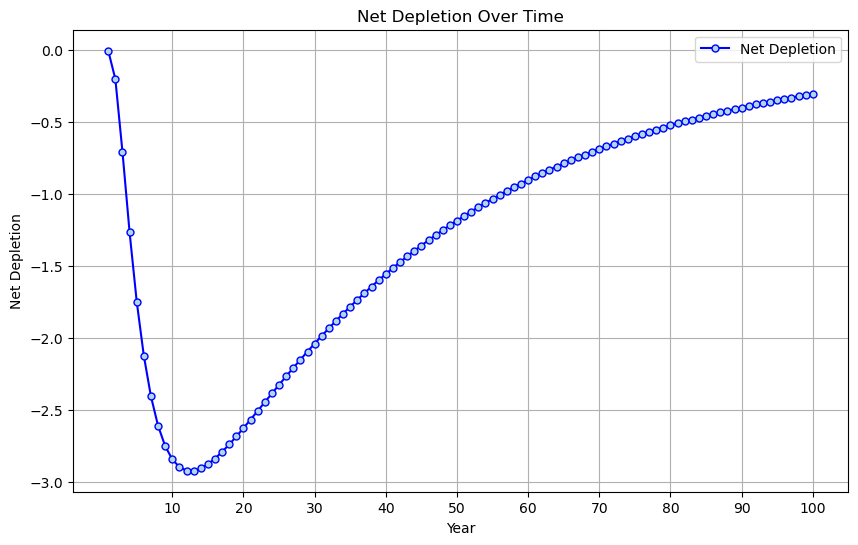

In [11]:
# Create a line plot for net depletion
plt.figure(figsize=(10, 6))  # Set the figure size

# Plotting 'Net_Depletion' against 'year' index
plt.plot(df.index, df['Net_Depletion'], color='blue', marker='o', 
         markersize=5, markeredgecolor='blue', markerfacecolor='lightblue', 
         label='Net Depletion')  # Customize the line and markers

# Set the x-axis ticks and labels at every 10 years
plt.xticks(ticks=[year for year in df.index if year % 10 == 0])  # Adjust ticks every 10 years
plt.xlabel('Year')  # X-axis label
plt.ylabel('Net Depletion')  # Y-axis label
plt.title('Net Depletion Over Time')  # Plot title

# Adding grid for better readability
plt.grid()

# Show legend (if needed)
plt.legend()

# Display the plot
plt.show()

# Step 7: Some Plot Improvments

**Explanation**

Let's update the plot to:
- <u>Add annotations for Transmissivity and Storativity.<u/>
- <u>Make it more visually appealing.<u/>

   - Here's an excellent [article on background colors by Lisa Charlotte Muth](https://blog.datawrapper.de/background-color-of-data-visualizations/), who analyzed hundreds of charts from leading organizations.  Mouse-over the figures for some cool examples of data visualization.
   - The article also shares a really nice [post by Sarah Leo](https://medium.economist.com/mistakes-weve-drawn-a-few-8cdd8a42d368), a visual data journalist at [The Economist](https://www.economist.com/).  It presents lots of examples of plots from The Economist and how they made them better.
<br>
<br>

**Applying the Principles Lisa Charlotte Muth:**

<u>Light-Mode Chart Example:<u/>
- Background Color: Use a very light, warm beige or pale yellow with low saturation (e.g., #fdf6e3).
- Data Elements: Use darker colors like dark gray or navy blue for lines and text to ensure high contrast.
- Gridlines and Annotations: Use subtle colors that are slightly darker than the background to avoid drawing attention away from the data.

<u>Dark-Mode Chart Example:<u\>
- Background Color: Opt for a dark gray instead of pure black (e.g., #2e2e2e).
- Data Elements: Use light colors such as whites or light blues for data lines and text to stand out against the dark background.
- Visual Comfort: Ensure that the overall contrast is balanced to prevent eye strain.

OK, now the code!

### Step 7A: Define a Funtion to Read Files and Extract T and S Values

**Explanation**

- The function `parse_fortran_file` reads through the lines of that single file, looking for the T and S values based on the defined regex pattern
- The function is called in the following code block and returns a dictionary, denoted by `{...}`, which contains the extracted values of T and S.
- It also converts T values from square feet per day to gallons per day per foot of drawdown.

In [12]:
# re is used to import the regular expressions module for pattern matching
# np is used for using NaN and numerical operations

def parse_fortran_file(file_path):
    """
    Parses a Fortran output file and extracts Transmissivity (T) and Storativity (S) values.
    
    Parameters:
        file_path (str): The path to the Fortran output file.
    
    Returns:
        headers (dict): A dictionary containing Transmissivity (T) and Storativity (S) values.
    """
    # Initialize headers dictionary to store extracted data
    headers = {}

    # Open the file for reading
    with open(file_path, 'r') as file:
        # Read all lines from the file
        lines = file.readlines()

        # Loop through each line to extract necessary values
        for line in lines:
            # Check if the line contains both Transmissivity and Storativity information
            if 'T =' in line and 'S =' in line:
                # Define the regex pattern to match T and S values
                t_s_pattern = r'T\s*=\s*([\d\.]+)\s*.*S\s*=\s*([\d\.]+)'
                match = re.search(t_s_pattern, line)
                
                if match:  # If a match is found
                    T_sq_ft_day = float(match.group(1))  # Extract T value as float
                    S = float(match.group(2))  # Extract S value as float
                    
                    # Store values in the headers dictionary
                    headers['Transmissivity_sq_ft_day'] = T_sq_ft_day
                    headers['Transmissivity_gpd_ft'] = T_sq_ft_day * 7.48  # Convert T to gallons/day
                    headers['Storativity_S'] = S
                
                break  # Exit the loop after finding the required values

    return headers  # Return the headers dictionary containing T and S values


<u>**Explanation of the `parse_fortran_file` Function**<u/>

The goal is to extract Transmissivity (T) and Storativity (S) values for later use as plot annotations.

1. **File Path Input**:
    - The function accepts a single parameter, `file_path`, which is a string representing the path to the Application and Basline output files.
<br>
<br>
2. **Checking File Existence**:
   - The function prints a message indicating that it is checking the specified file path.
   - It uses the `os.path.isfile()` method to determine if the file exists.
   - If the file is found, it prints a success message confirming that the file exists.
<br>
<br>
3. **Error Handling**:
   - If the file does not exist, the function prints an error message indicating that the specified file could not be found.
   - The function returns `True` if the file exists and `False` if it does not.

<u>**Using Regular Expressions**<u/>

*Yes, this is confusing to me too!  But using the string approaches used for depletion rates didn't work for T and S.  So, let's learn about regular expressions.  Bear with me!*

1. The regular expression will search for the `T` and `S` values in the data using the pattern: 
   `t_s_pattern = r'T\s*=\s*([\d\.]+)\s*.*S\s*=\s*([\d\.]+)'`
<br>
<br>
2. **Pattern Prefix `r`**:
    - The `r` before the string indicates this is a **raw string**. In raw strings, backslashes are treated literally, helping avoid confusion in patterns that use backslashes.
<br>
<br>
3. **`T\s*=\s*`**:
    - `T`: Matches the character T for Transmissivity.
    - `\s*`: Matches any whitespace character (like spaces or tabs) occurring zero or more times, allowing for spaces before and after the equals sign.
    - `=`: Matches the equals sign literally.
<br>
<br>
4. **`([\d\.]+)`**:
    - `[...]`: Defines a character class matching any of the characters inside the brackets.
    - `\d`: Matches any digit (0-9).
    - `.`: Matches a literal dot (decimal point).
    - `+`: Means "one or more" occurrences of the preceding character class.
    - `(...)`: Creates a capturing group, allowing you to retrieve matched values later. It captures the numeric value for Transmissivity.
<br>
<br>
5. **`\s*.*`**:
    - `\s*`: Matches any amount of whitespace (zero or more).
    - `.*`: Matches any character (the `.`) zero or more times (the `*`), allowing for additional text between the `T` and `S` values.
<br>
<br>
6. **`S\s*=\s*`**:
    - Mirrors the structure for Transmissivity but for Storativity:
    - `S`: Matches the character `S`, indicating Storativity.
    - `\s*=\s*`: Matches spaces around the equals sign for `S`.
<br>
<br>
7. **`([\d\.]+)`**:
    - Similar to the earlier capturing group; it captures the numeric value for Storativity (like `0.001`).

### Step 7B: Call Function to Gather, Organize and Check T and S Values

**Explanation**

- Use the `parse_fortran_file` function by calling it twice, once for the baseline file and once for the application file.
- The function processes both the Baseline and Application, gathers results from each file into separate variables (`baseline_headers` and `application_headers` in a dicationary called `T_S_values`, after checking for the consistency of T and S values between the two headers.

In [13]:
# Parse both the baseline and application files
baseline_headers = parse_fortran_file(baseline_file_path)
application_headers = parse_fortran_file(application_file_path)

# Initialize a structure to store T and S values for annotation
T_S_values = {
    'Transmissivity_sq_ft_day': baseline_headers['Transmissivity_sq_ft_day'],  # Store Baseline T
    'Transmissivity_gpd_ft': baseline_headers['Transmissivity_gpd_ft'],  # Store converted Baseline T
    'Storativity_S': baseline_headers['Storativity_S']  # Store Baseline S
}

# Check if T and S values are the same for both files
if (baseline_headers['Transmissivity_sq_ft_day'] == application_headers['Transmissivity_sq_ft_day'] and
    baseline_headers['Storativity_S'] == application_headers['Storativity_S']):
    
    print("Extracted values are the same for both files:", T_S_values)
else:
    print("Error: Transmissivity or Storativity values differ between baseline and application files.")

Extracted values are the same for both files: {'Transmissivity_sq_ft_day': 190.0, 'Transmissivity_gpd_ft': 1421.2, 'Storativity_S': 0.001}


### Step 7C: Find Year of Maximum (+ or -) Net Depletion for Plot Annotation

In [14]:
# Find the year with the maximum net depletion
year_max_net_dep = df['Net_Depletion'].idxmin()  # Get the year with the smallest value (greatest negative impact)
max_depletion_value = df['Net_Depletion'].min()  # Get the maximum negative net depletion value

print(f'The maximum depletion of {max_depletion_value} occurs in year {year_max_net_dep}.')

The maximum depletion of -2.921036000000001 occurs in year 13.0.


### Step 7C: Updated Plot

**Explanation**

- Add annotations for T and S.
- Improve the look of the plot.

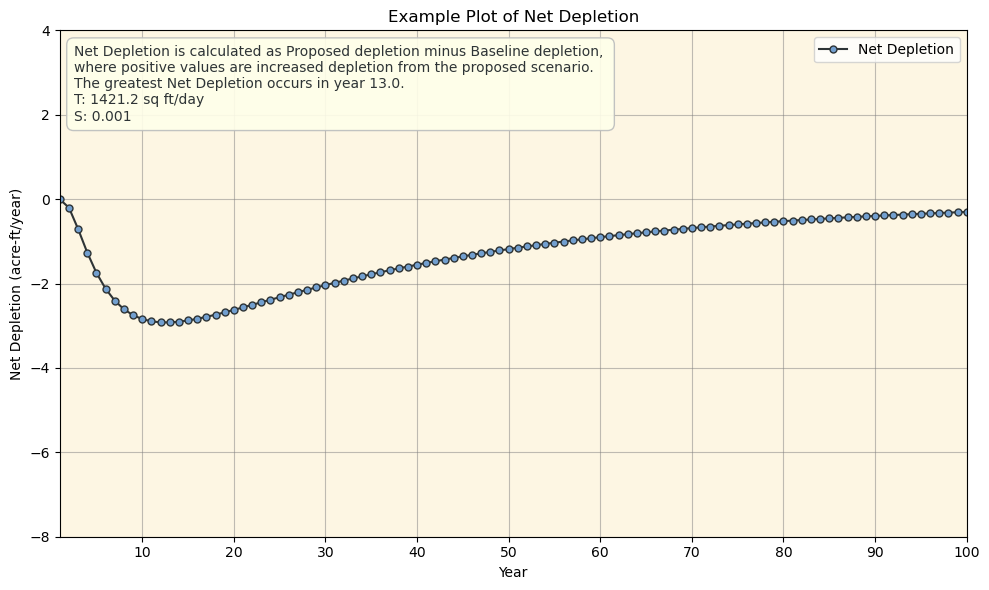

In [15]:
# Create a line plot for net depletion
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size

# Set a warm, very light, desaturated background color
ax.set_facecolor('#fdf6e3')  # Solarized light background color (very light, warm beige)

# Plotting 'Net_Depletion' against 'year' index
ax.plot(
    df.index,
    df['Net_Depletion'],
    color='#2e3436',  # Dark gray color for the line
    marker='o',
    markersize=5,
    markeredgecolor='#2e3436',
    markerfacecolor='#729fcf',  # Light desaturated blue for marker face
    label='Net Depletion'
)

# Set the x-axis ticks and labels at every 10 years
ax.set_xticks([year for year in df.index if year % 10 == 0])  # Adjust ticks every 10 years
ax.set_xlabel('Year')  # X-axis label
ax.set_ylabel('Net Depletion (acre-ft/year)')  # Y-axis label
ax.set_title('Example Plot of Net Depletion')  # Plot title

# Adding grid for better readability with lighter color and transparency
ax.grid(color='gray', alpha=0.5)  # Set color to gray and transparency to 50%

# Set the y-axis limits to a minimum of -8 and a maximum of 4
ax.set_ylim(-8, 4)

# Set the x-axis limits based on minimum and maximum values of the index (years)
ax.set_xlim(min(df.index), max(df.index))

# Round and format the Transmissivity and Storativity values
rounded_T = round(T_S_values["Transmissivity_gpd_ft"], 1)  # Round T value to one decimal place
formatted_S = "{:.3f}".format(T_S_values["Storativity_S"])  # Format S to three decimal places without unnecessary zeros

# Create a bounding box for annotations
bbox_props = dict(boxstyle='round,pad=0.5', edgecolor='#bbbdbd', facecolor='#ffffea', alpha=0.9)  # Use colors similar to the legend

# New text string to be displayed above T
additional_text = "Net Depletion is calculated as Proposed depletion minus Baseline depletion, \nwhere positive values are increased depletion from the proposed scenario."

# Create the annotation text
annotation_text = f"The greatest Net Depletion occurs in year {year_max_net_dep}."

# Combine the text strings for annotation
text_str = f"{additional_text}\nThe greatest Net Depletion occurs in year {year_max_net_dep}.\nT: {rounded_T} sq ft/day\nS: {formatted_S}"  # Add the additional text above T

ax.annotate(
    text_str,
    xy=(0, 1),  # Position near the top left of the figure
    xycoords='axes fraction',  # Coordinates are given as a fraction of the axes
    textcoords="offset points",
    xytext=(10, -65),  # Offset down for spacing
    ha='left',  # Left alignment for text
    color='#2e3436',  # Dark gray color for text
    bbox=bbox_props  # Apply the bounding box properties for background
)

# Show legend
ax.legend()

# Adjust the layout to prevent clipping of labels
plt.tight_layout()

# Save the figure as a PNG file called 'net_depletion_with_annotations.png'
plt.savefig('net_depletion_with_annotations.png', format='png', dpi=300)

# Display the plot
plt.show()